In [1]:
!pip install gurobipy

#Importing Necessary Libraries
import numpy as np
import random
import gurobipy as gp
from gurobipy import GRB
import matplotlib.pyplot as plt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 18.0 MB/s eta 0:00:00


**TASK 1**

Restricted license - for non-production use only - expires 2025-11-24
Optimization failed for r_values: [2.0]
Optimization failed for r_values: [2.25]
Optimization failed for r_values: [2.5]
Optimization failed for r_values: [2.75]


<ipython-input-2-0bfc95e737b5>:81: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(risk_values, expected_return_values, 'o', marker='o', linestyle='-')


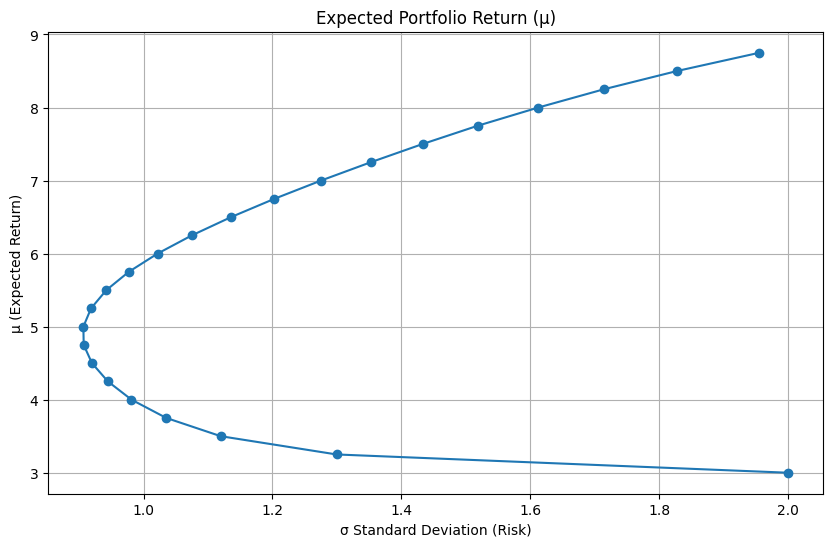

In [2]:

# Creating Functions to generate random data for mu and covariance matrix
def generate_information():

    total_numbers = 10 # Assets
    second_last_digit = 6  # Replace with second-to-last digit of your registration number
    last_digit = 0  # Replace with last digit of your registration number


    dummy_step = 10 * second_last_digit + last_digit

# Dummy loop for randomness based on registration number
    for _ in range(dummy_step):
        dummy = random.uniform(0, 1)

# Initializing the correlation matrix with zeros
    correlation_matrix = np.array([[0] * total_numbers for _ in range(total_numbers)], dtype=float)

# Generating corr matrix with pattern
    for i in range(total_numbers):
        for j in range(total_numbers):
            correlation_matrix[i][j] = (-1) ** abs(i - j) / (abs(i - j) + 1)

# Activiting the  sigma values
    sigma_values = np.array([[0] * 1 for _ in range(total_numbers)], dtype=float)

# mu is the vector μ in the assignment
    mu_values = np.array([[0] * 1 for _ in range(total_numbers)], dtype=float)
    sigma_values[0] = 2
    mu_values[0] = 3
    for i in range(total_numbers - 1):
        sigma_values[i + 1] = sigma_values[i] + 2 * random.uniform(0, 1)
        mu_values[i + 1] = mu_values[i] + 1
# Creating diagonal matrix
    diagonal_matrix = np.array([[0] * total_numbers for _ in range(total_numbers)], dtype=float)
    np.fill_diagonal(diagonal_matrix, sigma_values)

# Calculating the c2 matrix
    C2_matrix = np.matmul(np.matmul(diagonal_matrix, correlation_matrix), diagonal_matrix)

 # C is the matrix C in the assignment C = 0.5*(C2 + C2.T)
    final_matrix = 0.5 * (C2_matrix + C2_matrix.T)

    return mu_values, final_matrix, total_numbers


# Target returns
r_values = np.arange(2.00, 9.00, 0.25)

risk_values = []  # risk
expected_return_values = []  # expected return

mu_values, C, n = generate_information()

for r in r_values:
    model = gp.Model('portfolio_optimization')
    model.setParam('OutputFlag', 0)
    x_vars = model.addVars(n, lb=0, ub=1, vtype=GRB.CONTINUOUS, name='x')
    model.setObjective(sum(C[i, j] * x_vars[i] * x_vars[j] for i in range(n) for j in range(n)), GRB.MINIMIZE)
    model.addConstr(sum(mu_values[i][0] * x_vars[i] for i in range(n)) == r, name='return_constraint')
    model.addConstr(sum(x_vars[i] for i in range(n)) == 1, name='budget_constraint')

 #optmising the model
    model.optimize()

 # Verifing  whether optimization was effective
    if model.status == GRB.OPTIMAL:
        x_optimal = {i: x_vars[i].x for i in range(n)}
        risk = np.sqrt(sum(C[i, j] * x_optimal[i] * x_optimal[j] for i in range(n) for j in range(n)))
        expected_return = sum(mu_values[i][0] * x_optimal[i] for i in range(n))
        risk_values.append(risk)
        expected_return_values.append(expected_return)
    else:
        print('Optimization failed for r_values:', [r])

# Converting list to array
risk_values = np.array(risk_values)
expected_return_values = np.array(expected_return_values)

# Generating the plots
plt.figure(figsize=(10, 6))
plt.plot(risk_values, expected_return_values, 'o', marker='o', linestyle='-')
plt.xlabel('σ Standard Deviation (Risk)')  # sigma
plt.ylabel('μ (Expected Return)')  # mu
plt.title('Expected Portfolio Return (µ)')
plt.grid(True)
plt.show()


**TASK 2**

In [3]:
#target returns
r_vals = np.arange(2.00, 9.00, 0.25)

#List to store the sigma and mu values
risk_values_sigma = []  # risk
return_values_mu = []  # expected return

#Generating vectors for mean_return and covariance matrix
mean_return, covariance_matrix, num_assets = generate_information()


#Using for loop for each target value
for r in r_vals:
    model = gp.Model('portfolio_optimization')
    model.setParam('OutputFlag', 0)
    x_vars = model.addVars(num_assets, lb=0, ub=1, vtype=GRB.CONTINUOUS, name='x')
    model.setObjective(sum(covariance_matrix[i, j] * x_vars[i] * x_vars[j] for i in range(num_assets) for j in range(num_assets)), GRB.MINIMIZE)
    model.addConstr(sum(mean_return[i][0] * x_vars[i] for i in range(num_assets)) == r, name='return_constraint')
    model.addConstr(sum(x_vars[i] for i in range(num_assets)) <= 1, name='budget_constraint')

    model.optimize()

 # Verifing  whether optimization was effective
    if model.status == GRB.OPTIMAL:
        x_optimal = {i: x_vars[i].x for i in range(num_assets)}
        risk = np.sqrt(sum(covariance_matrix[i, j] * x_optimal[i] * x_optimal[j] for i in range(num_assets) for j in range(num_assets)))
        expected_return = sum(mean_return[i][0] * x_optimal[i] for i in range(num_assets))
        risk_values_sigma.append(risk)
        return_values_mu.append(expected_return)
    else:
        print('Optimization failed for r_values:', [r])

# Converting list to array
risk_values_sigma = np.array(risk_values_sigma)
return_values_mu = np.array(return_values_mu)

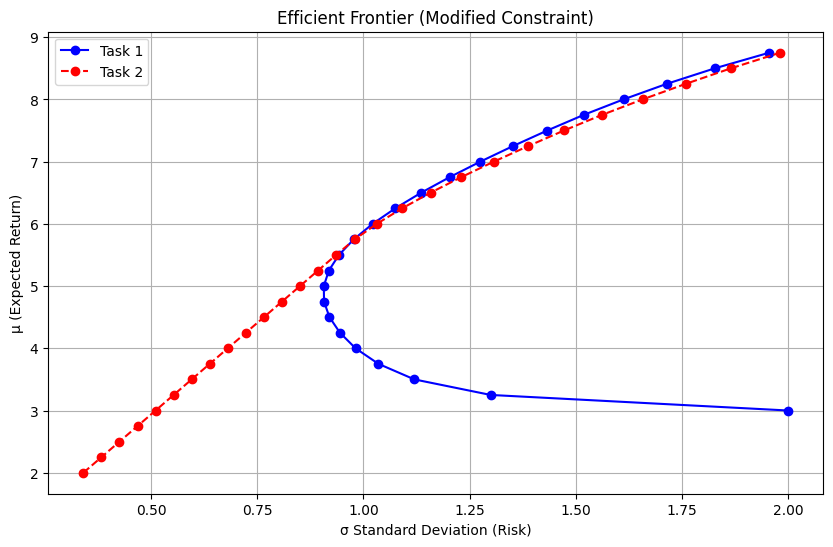

In [4]:
# Generating the plots

plt.figure(figsize=(10, 6))
plt.plot(risk_values, expected_return_values, marker='o', linestyle='-',color='b',label = 'Task 1')
plt.plot(risk_values_sigma, return_values_mu, marker='o', linestyle='--', color='r', label = 'Task 2')
plt.xlabel('σ Standard Deviation (Risk)') #sigma
plt.ylabel('μ (Expected Return)') #mmu
plt.title('Efficient Frontier (Modified Constraint)')
plt.legend()
plt.grid(True)
plt.show()

**TASK 3**

In [5]:
#target returns
r_vals = np.arange(2.00, 9.00, 0.25)

# Creating list to store the values for sigma and mu
risk_vals__si_task3 = []  # risk
return_vals_mu_task3 = []  # expected return

#Generating vectors for mean_return and covariance matrix
mean_return, covariance_matrix, num_assets = generate_information()

for r in r_vals:
    model = gp.Model('portfolio_optimization')
    model.setParam('OutputFlag', 0)
    x_vars = model.addVars(num_assets, lb=0, ub=1, vtype=GRB.CONTINUOUS, name='x')
    model.setObjective(sum(covariance_matrix[i, j] * x_vars[i] * x_vars[j] for i in range(num_assets) for j in range(num_assets)), GRB.MINIMIZE)
    model.addConstr(sum(mean_return[i][0] * x_vars[i] for i in range(num_assets)) >= r, name='return_constraint')
    model.addConstr(sum(x_vars[i] for i in range(num_assets)) == 1, name='budget_constraint')

    model.optimize()

# Verifing  whether optimization was effective
    if model.status == GRB.OPTIMAL:
        x_optimal = {i: x_vars[i].x for i in range(num_assets)}
        risk = np.sqrt(sum(covariance_matrix[i, j] * x_optimal[i] * x_optimal[j] for i in range(num_assets) for j in range(num_assets)))
        expected_return = sum(mean_return[i][0] * x_optimal[i] for i in range(num_assets))
        risk_vals__si_task3.append(risk)
        return_vals_mu_task3.append(expected_return)
    else:
        print('Optimization failed for r_values :', [r])

# Converting list to array
risk_vals__si_task3 = np.array(risk_vals__si_task3)
return_vals_mu_task3 = np.array(return_vals_mu_task3)

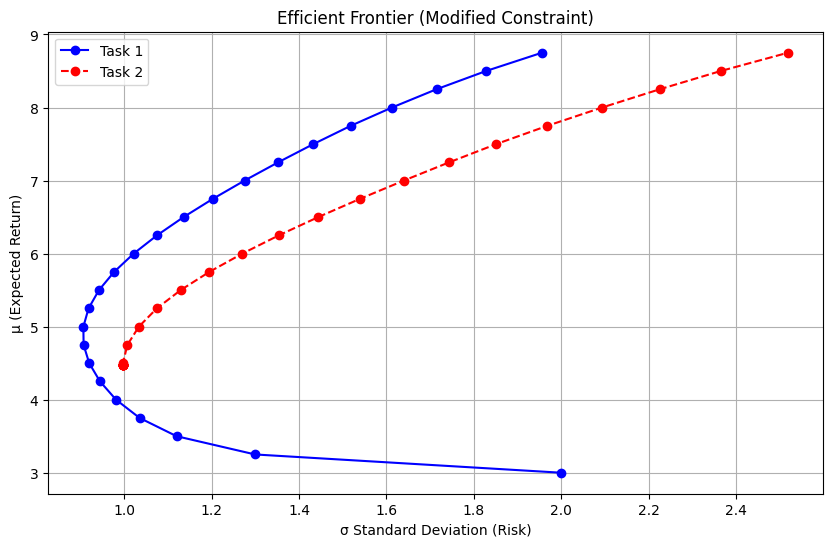

In [6]:
# Generating the plots

plt.figure(figsize=(10, 6))
plt.plot(risk_values, expected_return_values, marker='o', linestyle='-',color='b',label = 'Task 1')
plt.plot(risk_vals__si_task3, return_vals_mu_task3, marker='o', linestyle='--', color='r', label = 'Task 2')
plt.xlabel('σ Standard Deviation (Risk)') #sigma
plt.ylabel('μ (Expected Return)') #mmu
plt.title('Efficient Frontier (Modified Constraint)')
plt.legend()
plt.grid(True)
plt.show()

**TASK 4**

In [7]:
#target returns
r_vals = np.arange(2.00, 9.00, 0.25)

# Creating list to store the values for sigma and mu
risk_vals_si_task4 = []  # risk
return_vals_mu_task4 = []  # expected return

#Generating vectors for mean_return and covariance matrix
mean_return, covariance_matrix, num_assets = generate_information()

for r in r_vals:
    model = gp.Model('portfolio_optimization')
    model.setParam('OutputFlag', 0)
    x_vars = model.addVars(num_assets, vtype=GRB.CONTINUOUS, name='x')
    model.setObjective(sum(covariance_matrix[i, j] * x_vars[i] * x_vars[j] for i in range(num_assets) for j in range(num_assets)), GRB.MINIMIZE)
    model.addConstr(sum(mean_return[i][0] * x_vars[i] for i in range(num_assets)) == r, name='return_constraint')
    model.addConstr(sum(x_vars[i] for i in range(num_assets)) == 1, name='budget_constraint')

#Optimising the model
    model.optimize()

# Verifing  whether optimization was effective
    if model.status == GRB.OPTIMAL:
        x_optimal = {i: x_vars[i].x for i in range(num_assets)}
        risk = np.sqrt(sum(covariance_matrix[i, j] * x_optimal[i] * x_optimal[j] for i in range(num_assets) for j in range(num_assets)))
        expected_return = sum(mean_return[i][0] * x_optimal[i] for i in range(num_assets))
        risk_vals_si_task4.append(risk)
        return_vals_mu_task4.append(expected_return)
    else:
        print('Optimization failed for r_vals:', [r])


# Converting list to array
risk_vals_si_task4 = np.array(risk_vals_si_task4)
return_vals_mu_task4 = np.array(return_vals_mu_task4)

Optimization failed for r_vals: [2.0]
Optimization failed for r_vals: [2.25]
Optimization failed for r_vals: [2.5]
Optimization failed for r_vals: [2.75]


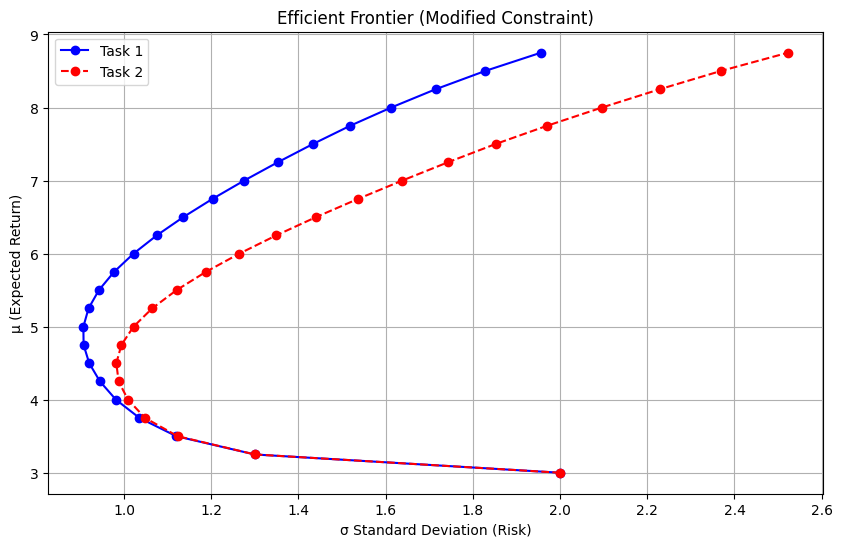

In [8]:
# Generating the plots
plt.figure(figsize=(10, 6))
plt.plot(risk_values, expected_return_values, marker='o', linestyle='-',color='b',label = 'Task 1')
plt.plot(risk_vals_si_task4, return_vals_mu_task4, marker='o', linestyle='--', color='r', label = 'Task 2')
plt.xlabel('σ Standard Deviation (Risk)') #sigma
plt.ylabel('μ (Expected Return)') #mmu
plt.title('Efficient Frontier (Modified Constraint)')
plt.legend()
plt.grid(True)
plt.show()